In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [29]:
#Reading CSV's
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [30]:
#SalePrice Data Info
describe_train = train.SalePrice.describe()
describe_train

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Train skew:  1.8828757597682129


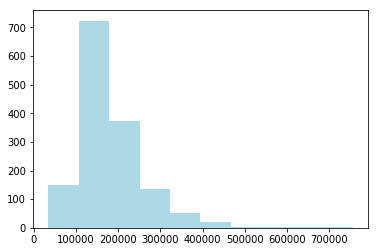

In [31]:
#Finding Train Skew
print ("Train skew: ", train.SalePrice.skew())
plt.hist(train.SalePrice, color='lightblue')
plt.show()

Target skew:  0.12133506220520406


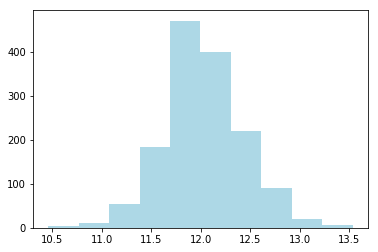

In [32]:
#Finding Target Skew
target = np.log(train.SalePrice)
print ("Target skew: ", target.skew())
plt.hist(target, color='lightblue')
plt.show()

In [33]:
#Finding Graph Correlations
numeric_features = train.select_dtypes(include=[np.number])
correlation = numeric_features.corr()
first_comparator = correlation['SalePrice'].sort_values(ascending=False)[:5]
second_comparator = correlation['SalePrice'].sort_values(ascending=False)[-5:]
print ("First values \n", first_comparator, "\n")
print ("Second values \n", second_comparator)

First values 
 SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

Second values 
 YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [34]:
#Categories
categories = train.select_dtypes(exclude=[np.number])
print (categories.describe())

       MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1      ...      GarageType  \
count       1460         1460       1460      ...            1379   
unique         3           25          9      ...               6   
top          Gtl        NAmes       Norm      ...          Attchd   
freq        1382          225       1260      ...             870   

       GarageFinish GarageQual GarageCond PavedDrive PoolQC  Fence  \
count          1379       1379       1379       1460      7    281   
unique            3          5          5          3      3      4   
top             Unf         TA         TA          Y     Gd  MnPrv   
freq    

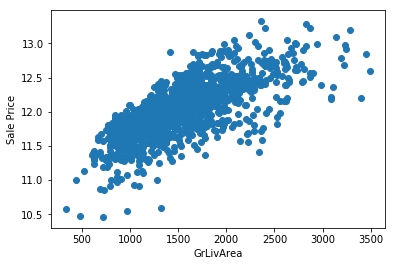

In [35]:
#Removing Outliers from Selected Index
train = train[train['GrLivArea'] < 3500]
plt.scatter(x = train['GrLivArea'], y = np.log(train.SalePrice))
plt.ylabel('Sale Price')
plt.xlabel('GrLivArea')
plt.show()

In [36]:
#Handling Nulls
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print(nulls)

              Null Count
Feature                 
PoolQC              1449
MiscFeature         1400
Alley               1363
Fence               1175
FireplaceQu          690
LotFrontage          259
GarageCond            81
GarageType            81
GarageYrBlt           81
GarageFinish          81
GarageQual            81
BsmtExposure          38
BsmtFinType2          38
BsmtFinType1          37
BsmtCond              37
BsmtQual              37
MasVnrArea             8
MasVnrType             8
Electrical             1
Utilities              0
YearRemodAdd           0
MSSubClass             0
Foundation             0
ExterCond              0
ExterQual              0


In [37]:
#Interpolate missing data with an average value
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [38]:
#Linear Model, Splitting the Test Size For a More Accurate Prediction
y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33)
lr = linear_model.LinearRegression()

In [39]:
#Fitting the Linear Regression Model
lin_reg = lr.fit(X_train, y_train)

In [40]:
#Test
model = lin_reg.score(X_test, y_test)
model

0.8951255532732286

In [41]:
#Predictions, RMSE
y_pred = lin_reg.predict(X_test)
pred = mean_squared_error(y_test, y_pred)
pred

0.016959809887404434

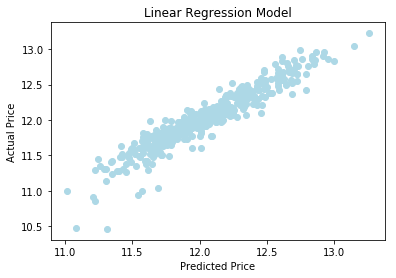

In [42]:
#Graphing the Model
val = y_test
plt.scatter(y_pred, val, color = 'lightblue')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [43]:
#Creating Final Predictions and the Data Frame to Submit
final = pd.DataFrame()
final['Id'] = test.Id
features = test.select_dtypes(include = [np.number]).drop(['Id'], axis = 1).interpolate()
predictions = lin_reg.predict(features)
final_predictions = np.exp(predictions)
print ("Original: ", predictions[:10], "\n")
print ("Final Predictions: ", final_predictions[:10])

Original:  [11.70824929 11.90909075 12.06821085 12.1889487  12.10365915 12.05840366
 12.14409321 12.01408935 12.17265399 11.64988814] 

Final Predictions:  [121570.45953574 148611.49268476 174243.81829188 196604.36644683
 180531.24530225 172543.32836147 187980.44376749 165064.13148256
 193426.71529384 114678.53423454]


In [44]:
final['SalePrice'] = final_predictions
final.to_csv('Submission1.csv', index=False)
final

,Id,SalePrice
0,1461,121570.459536
1,1462,148611.492685
2,1463,174243.818292
3,1464,196604.366447
4,1465,180531.245302
5,1466,172543.328361
6,1467,187980.443767
7,1468,165064.131483
8,1469,193426.715294
9,1470,114678.534235
